# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

In [3]:
os.getcwd()

'C:\\Users\\Abhinov Baruah\\Documents\\BIGMOUNTAIN_DOCUMENT_STEP6'

In [4]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '1588204790_GuidedCapstoneStep6HL.ipynb.zip',
 'Notebook_stepsix.ipynb',
 '__MACOSX']

In [5]:
os.chdir(r'C:\Users\Abhinov Baruah\Documents\DataWrangling_Step2\Step 2\data')

In [6]:
os.getcwd()

'C:\\Users\\Abhinov Baruah\\Documents\\DataWrangling_Step2\\Step 2\\data'

In [7]:
os.listdir(os.getcwd())

['Model_Coefficients.csv',
 'step2_output.csv',
 'Step3_EDA.csv',
 'Step3_output.csv',
 'SWEETVIZ_REPORT.html']

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [26]:
df = pd.read_csv('Step3_output.csv')
df.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,0
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0


In [36]:
# Dropping the state column from the dataframe as STATE column is not an actionable trait which the 
# BIG MOUNTAIN resort personnel would be worried about.
df.drop('state',axis=1,inplace=True)

In [37]:
df.head()

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,3939,2500,1,0.0,0,2,2,0,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1
1,Eaglecrest Ski Area,2600,1540,0,0.0,0,0,0,0,4,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1
2,Hilltop Ski Area,2090,294,0,0.0,0,0,0,1,0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
3,Arizona Snowbowl,11500,2300,0,0.0,1,0,2,2,1,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,0
4,Sunrise Park Resort,11100,1800,0,0.0,0,1,2,3,1,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0


In [9]:
# Encoding the categorical variable 'state' to dummies:

#df = pd.concat([df.drop('state',axis=1),pd.get_dummies(df['state'],drop_first=True)],axis=1)


In [10]:
df.head()

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alyeska Resort,3939,2500,1,0.0,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,2600,1540,0,0.0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,2090,294,0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,11500,2300,0,0.0,1,0,2,2,1,...,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,0,0.0,0,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.shape

(330, 25)

In [95]:
# Standardize the magnitude of numerical features:

# first we import the preprocessing package from the sklearn library:
from sklearn.preprocessing import StandardScaler

# Create the Variable X which is going to consist of the all the independent features apart from the target/response variable
# AdultWeekend,Name:
X = df.drop(['Name','AdultWeekend'],axis=1)

# Create the response variable y which contains the target feature AdultWeekend which we are going to study:
y = df['AdultWeekend']

# Initilize a scaler object:
scaler = StandardScaler()
#StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler.fit(X)
#declare a variable X_scaled, and assign it the result of calling the transform() method with parameter X
X_scaled = scaler.transform(X)


In [96]:
scaler.scale_

array([3.72987174e+03, 9.46427309e+02, 5.59097068e-01, 5.49647186e-02,
       6.50697161e-01, 2.19496042e+00, 1.31025481e+00, 1.61667448e+00,
       1.81227576e+00, 2.05651332e+00, 5.78989018e+00, 4.60114929e+01,
       2.10635708e+00, 1.14561232e+00, 1.80512681e+03, 2.42011329e+02,
       3.21848135e+01, 1.09097820e+02, 1.33221783e+02, 2.38625607e+01,
       2.86993991e+01, 9.33231608e+01, 4.82808207e-01])

In [97]:
# Splitting the data into TEST and TRAIN:
# Import train_test_split from sklearn.model_selection:
from sklearn.model_selection import train_test_split

#Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Now lets split the data into train and test dataset by calling the train_test_split():

train_X,test_X,train_y,test_y = train_test_split(X_scaled,y,test_size=0.25,random_state=1)

In [98]:
# Create a linear Model to predict the response variable:

from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error

linear = linear_model.LinearRegression()
model1 = linear.fit(train_X,train_y)
y_predict = model1.predict(test_X)

In [99]:
model1_exp_var_score = explained_variance_score(test_y,y_predict)
print('The mean variance score for Model1 is : ' + str(model1_exp_var_score))

The mean variance score for Model1 is : 0.9339722965145054


In [100]:
model1_mean_abs_er = mean_absolute_error(test_y,y_predict)
print('The mean absolute error for Model1 is : ' + str(model1_mean_abs_er))

The mean absolute error for Model1 is : 5.2538454724987345


In [101]:
model1.intercept_

64.04781924014142

In [102]:
print('Y predict is :' + str(y_predict))

Y predict is :[ 59.46411998  77.92407394  83.03260265  78.38765243  69.14509304
  81.10483594  36.79584434  48.29082544  89.12511457  87.39692686
  51.67565148  81.64101912  52.88005607  65.39302778  63.98725786
  89.67755384  43.55234607  77.7451304   64.436145    42.78945733
 109.11493249  37.69073774  54.39708949  50.44798568  49.15163282
  58.11412688  68.83981203  59.79264132  61.70179429  65.44143481
  36.97621155  54.40254954  80.86234774  57.17060873  77.74556651
  54.31284391  24.03429465  29.93666364  53.30201622  37.92812849
  48.10657058  62.3637145   90.44699305  68.68685733  71.46966365
  52.73743578  62.32049631 167.15625551  30.99825644  63.01181637
  61.43774708  61.99039887  52.97854646  44.67196165  60.10608801
  41.42875642  85.17472311  32.279739   122.80363002 116.17024989
  57.45934582  54.7791179   40.34473061  86.19131094  64.15520419
  48.29500457  38.07985025  95.44682617  57.2991489   27.49366628
  64.94415453 151.09144957  56.24067277  63.80603797  76.23782

In [103]:
train_X.shape

(247, 23)

In [104]:
train_y.shape

(247,)

In [105]:
model1.coef_

array([ 4.41792708,  1.17498148,  0.03208477,  0.25128887,  0.54555088,
        1.23913753,  1.08869798,  1.4273502 ,  0.21728053, -1.49368915,
        0.71894451, -1.25530754,  0.11647918, -0.39273148, -1.91750934,
       -0.34567412,  0.85788477,  0.2886505 , -0.95156878, 19.81008466,
       -0.4573392 ,  0.88284433,  5.5644892 ])

In [106]:
pd.DataFrame(model1.coef_,X.columns,columns=['Coefficient']).sort_values('Coefficient',ascending=False)

,Coefficient
AdultWeekday,19.810085
clusters,5.564489
summit_elev,4.417927
triple,1.427350
fastQuads,1.239138
vertical_drop,1.174981
quad,1.088698
NightSkiing_ac,0.882844
daysOpenLastYear,0.857885
total_chairs,0.718945


In [107]:
pd.DataFrame(abs(model1.coef_),X.columns,columns=['Coefficient']).sort_values('Coefficient',ascending=False)

,Coefficient
AdultWeekday,19.810085
clusters,5.564489
summit_elev,4.417927
SkiableTerrain_ac,1.917509
surface,1.493689
triple,1.427350
Runs,1.255308
fastQuads,1.239138
vertical_drop,1.174981
quad,1.088698


In [108]:
ActVsPred = pd.DataFrame({'Actual': test_y, 'Predicted': y_predict})
ActVsPred.head(25)

,Actual,Predicted
0,64.16681,59.464120
1,88.00000,77.924074
2,74.00000,83.032603
3,78.00000,78.387652
4,64.16681,69.145093
5,79.00000,81.104836
6,60.00000,36.795844
7,69.00000,48.290825
8,81.00000,89.125115
9,88.00000,87.396927


In [109]:
ActVsPred.shape

(83, 2)

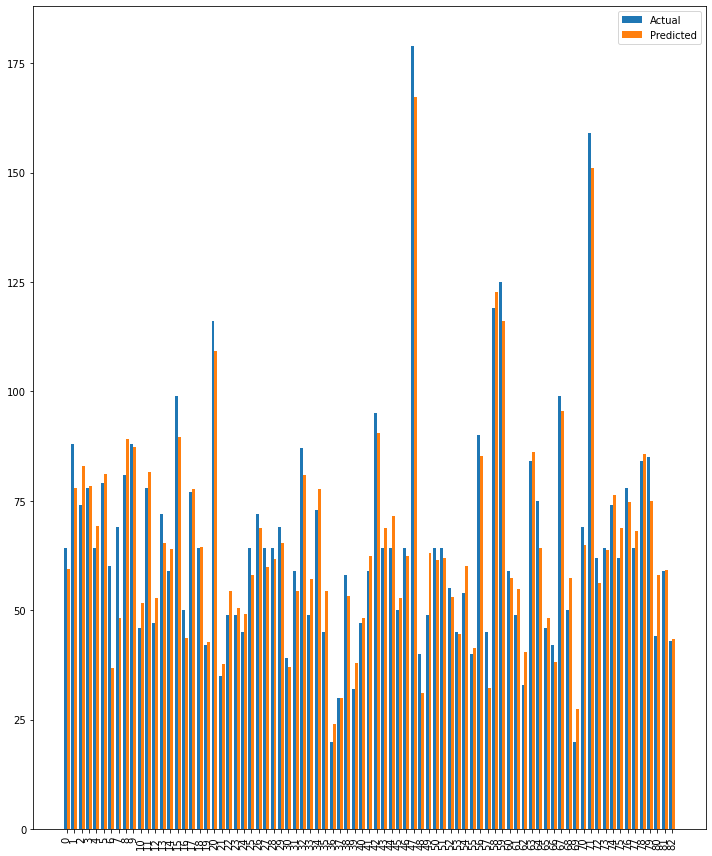

In [110]:
fig,ax =plt.subplots(figsize=(10,12))
bar_width = 0.4
ax.bar(ActVsPred.index,ActVsPred['Actual'],width=bar_width,label='Actual')
ax.bar(ActVsPred.index+bar_width,ActVsPred['Predicted'],label='Predicted',width=bar_width)
ax.set_xticklabels(ActVsPred.index,rotation=90)
ax.set_xticks(ActVsPred.index + bar_width/2)
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend()
fig.tight_layout()
plt.show()

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [111]:
df[df['Name'].str.contains('Big Mountain')]

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Big Mountain Resort,6817,2353,0,0.0,0,3,2,6,0,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,0


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [128]:
Bigmount = df[df['Name'].str.contains('Big Mountain')].drop(['Name','AdultWeekend'],axis=1)

from sklearn.preprocessing import StandardScaler
#scaler_obj = StandardScaler()
#scaler_obj.fit(X)
X_scaled_bigmount = scaler.transform(Bigmount) 

In [129]:
#Predicting the AdultWeekend price for BigMount Resort:

Price_Predict_BigMount = model1.predict(X_scaled_bigmount)

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [182]:
# AdultWeekend Price for Big Mountain Resort:

Price_Predict_BigMount[0]

84.93119403605019

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [183]:
df['AdultWeekend'][df['Name'].str.contains("Big Mountain Resort")]

151    81.0
Name: AdultWeekend, dtype: float64

Text(0.5, 1.0, 'BIG MOUNTAIN ADULTWEEKEND TICKETS COMPARISON')

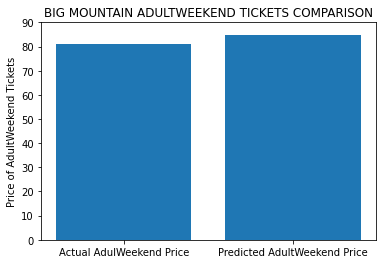

In [200]:
plt.bar(x=['Actual AdulWeekend Price','Predicted AdultWeekend Price'],height=[df.loc[151,'AdultWeekend'],Price_Predict_BigMount[0]])
plt.ylabel('Price of AdultWeekend Tickets')
plt.ylim(0,90)
plt.title('BIG MOUNTAIN ADULTWEEKEND TICKETS COMPARISON')

Modelling the data to find the projected days BIG MOUNTAIN RESORT would remain open and its relationship with other features in the dataset.

In [132]:
# Lets have a look at the number of days the resort should remain open for BIGMOUNTAIN

# first we import the preprocessing package from the sklearn library:
from sklearn.preprocessing import StandardScaler

# Create the Variable X which is going to consist of the all the independent features apart from the target/response variable
# AdultWeekend,Name:
X1 = df.drop(['Name','projectedDaysOpen'],axis=1)

# Create the response variable y which contains the target feature Projected Days Open which we are going to study:
y1 = df['projectedDaysOpen']

# Initilize a scaler object:
scaler1 = StandardScaler()
#StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler1.fit(X1)
#declare a variable X_scaled, and assign it the result of calling the transform() method with parameter X
X_scaled1 = scaler1.transform(X1)

In [133]:
# Splitting the data into TEST and TRAIN:
# Import train_test_split from sklearn.model_selection:
from sklearn.model_selection import train_test_split

#Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y1 = y1.ravel()

# Now lets split the data into train and test dataset by calling the train_test_split():

train_X1,test_X1,train_y1,test_y1 = train_test_split(X_scaled1,y1,test_size=0.25,random_state=1)

In [134]:
# Create a linear Model to predict the response variable:

from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error

linear1 = linear_model.LinearRegression()
model2 = linear.fit(train_X1,train_y1)
y_predict2 = model2.predict(test_X1)

In [135]:
model2_exp_var_score = explained_variance_score(test_y1,y_predict2)
print('The mean variance score for Model2 is : ' + str(model2_exp_var_score))

The mean variance score for Model2 is : -0.06567324402398511


In [136]:
model2_mean_abs_er = mean_absolute_error(test_y1,y_predict2)
print('The mean absolute error for Model2 is : ' + str(model2_mean_abs_er))

The mean absolute error for Model2 is : 13.802346245068259


In [137]:
model2.intercept_

120.16337475689234

In [163]:
pd.DataFrame(model2.coef_,index=X1.columns,columns=['Coeffecient2']).sort_values('Coeffecient2',ascending=False)

,Coeffecient2
daysOpenLastYear,23.109939
averageSnowfall,5.493341
vertical_drop,4.793756
AdultWeekday,2.801657
quad,2.349470
TerrainParks,1.925696
double,1.229395
triple,1.116777
fastSixes,0.728737
total_chairs,0.573148


In [139]:
pd.DataFrame(abs(model2.coef_),index=X1.columns,columns=['Coeffecient2']).sort_values('Coeffecient2',ascending=False).head(10)

,Coeffecient2
daysOpenLastYear,23.109939
averageSnowfall,5.493341
vertical_drop,4.793756
Snow Making_ac,4.543785
summit_elev,4.065916
AdultWeekday,2.801657
quad,2.349470
Runs,2.179490
TerrainParks,1.925696
AdultWeekend,1.498407


In [140]:
Bigmount_DAYSOPEN = df[df['Name'].str.contains('Big Mountain')].drop(['Name','projectedDaysOpen'],axis=1)

X_scaled_bigmountdays = scaler1.transform(Bigmount_DAYSOPEN)

In [141]:
#Predicting the Days Open for Big Mountain Resort:

DaysOpen_Predict_BigMount = model2.predict(X_scaled_bigmountdays)
print(str(DaysOpen_Predict_BigMount))

[128.06055899]


In [201]:
# Actual number of days open for Big Mountain Resort:

df['projectedDaysOpen'][df['Name'].str.contains('Big Mountain')]

151    123.0
Name: projectedDaysOpen, dtype: float64

In [203]:
DaysOpen_Predict_BigMount[0]

128.0605589885984

Text(0.5, 1.0, 'BIG MOUNTAIN PROJECTED DAYS OPEN COMPARISON')

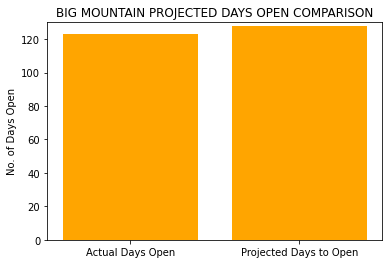

In [210]:
plt.bar(x=['Actual Days Open','Projected Days to Open'],height=[df.loc[151,'projectedDaysOpen'],DaysOpen_Predict_BigMount[0]],
       color='orange')
plt.ylabel('No. of Days Open')
plt.ylim(0,130)
plt.title('BIG MOUNTAIN PROJECTED DAYS OPEN COMPARISON')

In [143]:
ActVsPred2 = pd.DataFrame({'Actual': test_y1, 'Predicted': y_predict2})
ActVsPred2.head(25)

,Actual,Predicted
0,138.0,144.404286
1,146.0,136.418456
2,124.0,131.400946
3,129.0,131.279098
4,137.0,155.068272
5,120.0,116.233955
6,110.0,114.058655
7,90.0,109.578802
8,120.0,129.727092
9,120.0,147.293881


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   summit_elev        330 non-null    int64  
 2   vertical_drop      330 non-null    int64  
 3   trams              330 non-null    int64  
 4   fastEight          330 non-null    float64
 5   fastSixes          330 non-null    int64  
 6   fastQuads          330 non-null    int64  
 7   quad               330 non-null    int64  
 8   triple             330 non-null    int64  
 9   double             330 non-null    int64  
 10  surface            330 non-null    int64  
 11  total_chairs       330 non-null    int64  
 12  Runs               330 non-null    float64
 13  TerrainParks       330 non-null    float64
 14  LongestRun_mi      330 non-null    float64
 15  SkiableTerrain_ac  330 non-null    float64
 16  Snow Making_ac     330 non

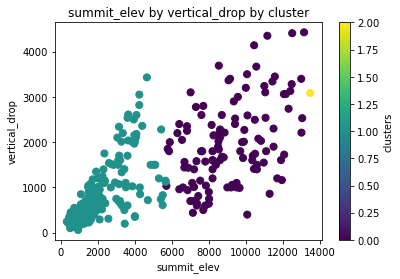

In [145]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(df['summit_elev'], df['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
cbar =plt.colorbar()
cbar.set_label('clusters')
#plt.savefig('figures/fig1.png',bbox_inches='tight')

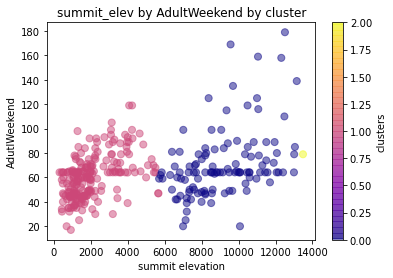

In [146]:
plt.scatter(df['summit_elev'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='plasma', label ='clusters',alpha=0.5)
plt.xlabel('summit elevation')
plt.ylabel('AdutlWeekend')
plt.title('summit_elev by AdultWeekend by cluster')
cbar =plt.colorbar()
cbar.set_label('clusters')
#plt.xscale('log')
#plt.yscale('log')

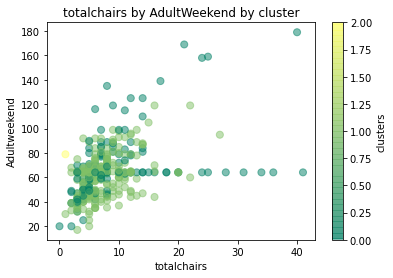

In [147]:
plt.scatter(df['total_chairs'],df['AdultWeekend'], c=df['clusters'], s=50, cmap='summer',alpha=0.5)
plt.xlabel('totalchairs')
plt.ylabel('Adultweekend')
plt.title('totalchairs by AdultWeekend by cluster')
#plt.axis([25])
cbar =plt.colorbar()
cbar.set_label('clusters')

Text(0.5, 1.0, 'surface by AdultWeekend by cluster')

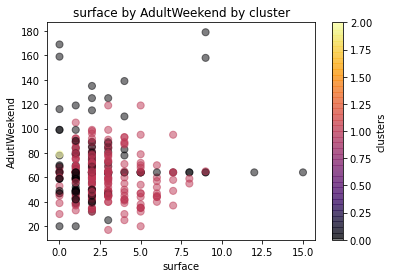

In [148]:
plt.scatter(df['surface'],df['AdultWeekend'], c=df['clusters'], s=50, cmap='inferno',alpha=0.5)
plt.xlabel('surface')
plt.ylabel('AdutlWeekend')
cbar =plt.colorbar()
cbar.set_label('clusters')
plt.title('surface by AdultWeekend by cluster')

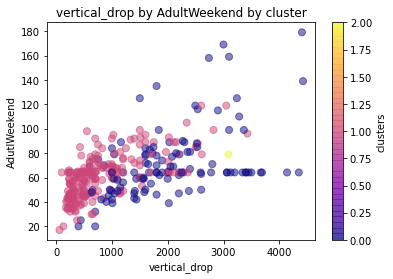

In [149]:
plt.scatter(df['vertical_drop'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='plasma', label ='clusters',alpha=0.5)
plt.xlabel('vertical_drop')
plt.ylabel('AdutlWeekend')
plt.title('vertical_drop by AdultWeekend by cluster')
cbar =plt.colorbar()
cbar.set_label('clusters')
#plt.xscale('log')
#plt.yscale('log')

Text(0.5, 1.0, 'fastQuads by AdultWeekend by cluster')

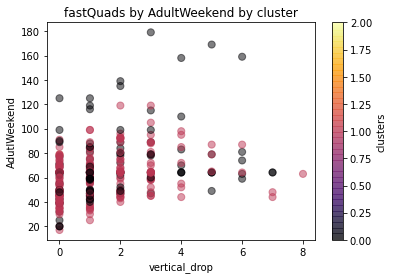

In [150]:
plt.scatter(df['triple'],df['AdultWeekend'], c=df['clusters'], s=50, cmap='inferno',alpha=0.5)
plt.xlabel('vertical_drop')
plt.ylabel('AdutlWeekend')
cbar =plt.colorbar()
cbar.set_label('clusters')
plt.title('fastQuads by AdultWeekend by cluster')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [151]:
os.getcwd()
os.chdir(r'C:\\Users\\Abhinov Baruah\\Documents\\DataWrangling_Step2\\Step 2\\')

In [152]:
os.listdir(os.getcwd())

['.DS_Store',
 '.ipynb_checkpoints',
 '1589505302_05152020_updated_ski_data_-_updated_ski_data.csv',
 'data',
 'figures',
 'models',
 'Notebook_steptwo.ipynb',
 'updated_ski_data (1).csv',
 'User']

In [153]:
import pickle
s = pickle.dumps(model1)
from joblib import dump, load
dump(model1, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [164]:
Model1_Coefficients = pd.DataFrame(model1.coef_,index=X.columns,columns=['Coefficient'])
print(Model_Coefficients)

                   Coefficient
summit_elev          -4.065916
vertical_drop         4.793756
trams                -1.215711
fastEight            -0.550124
fastSixes             0.728737
fastQuads            -0.408196
quad                  2.349470
triple                1.116777
double                1.229395
surface              -1.294270
total_chairs          0.573148
Runs                 -2.179490
TerrainParks          1.925696
LongestRun_mi         0.362613
SkiableTerrain_ac    -0.007721
Snow Making_ac       -4.543785
daysOpenLastYear     23.109939
yearsOpen             0.242258
averageSnowfall       5.493341
AdultWeekday          2.801657
projectedDaysOpen    -1.498407
NightSkiing_ac       -0.635482
clusters              0.411559


In [165]:
os.getcwd()

'C:\\Users\\Abhinov Baruah\\Documents\\DataWrangling_Step2\\Step 2\\data'

In [166]:
os.listdir(os.getcwd())

['Model_Coefficients.csv',
 'Model_Coefficients_TicketPrice.csv',
 'step2_output.csv',
 'Step3_EDA.csv',
 'Step3_output.csv',
 'SWEETVIZ_REPORT.html']

In [167]:
os.chdir(r'C:\Users\Abhinov Baruah\Documents\DataWrangling_Step2\Step 2\data')

In [168]:
os.listdir(os.getcwd())

['Model_Coefficients.csv',
 'Model_Coefficients_TicketPrice.csv',
 'step2_output.csv',
 'Step3_EDA.csv',
 'Step3_output.csv',
 'SWEETVIZ_REPORT.html']

In [174]:
Model1_Coefficients.to_csv('Model_Coefficients_TicketPrice.csv')

In [175]:
model2.coef_

array([-4.06591555e+00,  4.79375560e+00, -1.21571080e+00, -5.50124032e-01,
        7.28736664e-01, -4.08196243e-01,  2.34946959e+00,  1.11677699e+00,
        1.22939470e+00, -1.29426988e+00,  5.73147694e-01, -2.17949016e+00,
        1.92569604e+00,  3.62613312e-01, -7.72080561e-03, -4.54378461e+00,
        2.31099393e+01,  2.42258018e-01,  5.49334078e+00,  2.80165709e+00,
       -1.49840693e+00, -6.35481544e-01,  4.11559026e-01])

In [176]:
Model2_Coeff = pd.DataFrame(model2.coef_,index=X1.columns,columns=['Coefficient2'])

In [179]:
Model2_Coeff.to_csv('Model_Coefficients_ProjDaysOpen.csv')